In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df = pd.read_csv('Dataset.House.txt')
print(df.to_string())

    Area  Bedrooms  Bathrooms       Location  Parking  Price
0   1200         2          2     Vijayawada        1     56
1   1800         3          3  Visakhapatnam        2     91
2   1400         3          2         Guntur        1     68
3    950         1          1         Kadapa        0     39
4   1600         3          2       Tirupati        2     77
5   2000         4          3     Vijayawada        2    105
6   1300         2          2      Anantapur        1     58
7    900         1          1        Nellore        0     41
8   1750         3          2    Rajahmundry        1     71
9   2200         4          3  Visakhapatnam        2    125
10  1500         3          2     Vijayawada        1     82
11  1350         2          1        Kurnool        1     59
12  1000         2          1         Ongole        0     45
13  1450         2          2         Guntur        1     66
14  2100         4          3  Visakhapatnam        2    115
15  1600         3      

In [14]:
org_price =df['Price']
org_price

0      56
1      91
2      68
3      39
4      77
5     105
6      58
7      41
8      71
9     125
10     82
11     59
12     45
13     66
14    115
15     79
16     42
17     95
18     54
19    135
20     53
21     74
22     78
23     38
24     88
25    130
26     51
27     57
28     68
29     97
30    145
31     65
32     40
33     72
34    120
35     93
36     55
37     76
38     43
39    138
40     60
41     83
42     48
43     75
44    132
45     63
46     59
47     44
48     89
Name: Price, dtype: int64

In [15]:
inputs = df.drop(['Price'],axis=1)
inputs = pd.get_dummies(inputs, columns=['Location'], drop_first=True)
inputs

,Area,Bedrooms,Bathrooms,Parking,Location_Guntur,Location_Kadapa,Location_Kurnool,Location_Nellore,Location_Ongole,Location_Rajahmundry,Location_Tirupati,Location_Vijayawada,Location_Visakhapatnam
0,1200,2,2,1,False,False,False,False,False,False,False,True,False
1,1800,3,3,2,False,False,False,False,False,False,False,False,True
2,1400,3,2,1,True,False,False,False,False,False,False,False,False
3,950,1,1,0,False,True,False,False,False,False,False,False,False
4,1600,3,2,2,False,False,False,False,False,False,True,False,False
5,2000,4,3,2,False,False,False,False,False,False,False,True,False
6,1300,2,2,1,False,False,False,False,False,False,False,False,False
7,900,1,1,0,False,False,False,True,False,False,False,False,False
8,1750,3,2,1,False,False,False,False,False,True,False,False,False
9,2200,4,3,2,False,False,False,False,False,False,False,False,True


In [16]:
X = inputs.to_numpy()
X.shape

(49, 13)

In [17]:
Y =df['Price'].to_numpy()
Y

array([ 56,  91,  68,  39,  77, 105,  58,  41,  71, 125,  82,  59,  45,
        66, 115,  79,  42,  95,  54, 135,  53,  74,  78,  38,  88, 130,
        51,  57,  68,  97, 145,  65,  40,  72, 120,  93,  55,  76,  43,
       138,  60,  83,  48,  75, 132,  63,  59,  44,  89])

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)
from sklearn.metrics import r2_score
ycap = model.predict(X)
r2 = r2_score(Y, ycap)
print(f'R-squared score: {r2}')


R-squared score: 0.9829650183284862


In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X,Y)
ycap = model.predict(X)
r2 = r2_score(Y, ycap)
print(f'Random forest regreesor accuracy: {r2}')

Random forest regreesor accuracy: 0.996798164389281


In [20]:
from sklearn.svm import SVR
model =SVR(kernel='linear')
model.fit(X,Y)
ycap = model.predict(X)
r2 = r2_score(Y,ycap)
print(f"support vector regressor accuracy: {r2}")

support vector regressor accuracy: 0.9690198206869817


In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,Y)
ycap = model.predict(X)
r2 = r2_score(Y,ycap)
print(f"Decision tree regressor accuracy: {r2}")

Decision tree regressor accuracy: 0.999324838369652


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()      
model.fit(X_train, Y_train)
ycap = model.predict(X_test)
r2 = r2_score(Y_test, ycap) 
print(f'R-squared score on test set: {r2}')

R-squared score on test set: 0.9906158638033075


In [23]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X,Y)
ycap = model.predict(X)
r2 = r2_score(Y,ycap)
print(f'KNN regressor accuracy: {r2}')

KNN regressor accuracy: 0.9790989249576547


In [24]:
Y

array([ 56,  91,  68,  39,  77, 105,  58,  41,  71, 125,  82,  59,  45,
        66, 115,  79,  42,  95,  54, 135,  53,  74,  78,  38,  88, 130,
        51,  57,  68,  97, 145,  65,  40,  72, 120,  93,  55,  76,  43,
       138,  60,  83,  48,  75, 132,  63,  59,  44,  89])

In [25]:
ycap

array([ 54.6,  88.4,  64.4,  40.6,  76.8, 100.2,  56.4,  40.6,  79.4,
       124.4,  74.6,  57.8,  40.8,  66. , 119.4,  76.8,  44.4,  88.6,
        56.6, 134.6,  56.4,  76.6,  76.4,  40.6,  79.4, 128.4,  52.8,
        55.4,  74.6,  95.8, 134.6,  64.4,  40.6,  76.8, 124.4,  88.6,
        56.6,  76.8,  44.4, 134.6,  57.8,  74.6,  45.6,  84. , 124.4,
        66. ,  56.4,  44.4,  93. ])

In [26]:
pre = (Y,ycap)
pre

(array([ 56,  91,  68,  39,  77, 105,  58,  41,  71, 125,  82,  59,  45,
         66, 115,  79,  42,  95,  54, 135,  53,  74,  78,  38,  88, 130,
         51,  57,  68,  97, 145,  65,  40,  72, 120,  93,  55,  76,  43,
        138,  60,  83,  48,  75, 132,  63,  59,  44,  89]),
 array([ 54.6,  88.4,  64.4,  40.6,  76.8, 100.2,  56.4,  40.6,  79.4,
        124.4,  74.6,  57.8,  40.8,  66. , 119.4,  76.8,  44.4,  88.6,
         56.6, 134.6,  56.4,  76.6,  76.4,  40.6,  79.4, 128.4,  52.8,
         55.4,  74.6,  95.8, 134.6,  64.4,  40.6,  76.8, 124.4,  88.6,
         56.6,  76.8,  44.4, 134.6,  57.8,  74.6,  45.6,  84. , 124.4,
         66. ,  56.4,  44.4,  93. ]))

In [27]:
np.c_[Y,ycap]  # Combine Y and ycap for comparison

array([[ 56. ,  54.6],
       [ 91. ,  88.4],
       [ 68. ,  64.4],
       [ 39. ,  40.6],
       [ 77. ,  76.8],
       [105. , 100.2],
       [ 58. ,  56.4],
       [ 41. ,  40.6],
       [ 71. ,  79.4],
       [125. , 124.4],
       [ 82. ,  74.6],
       [ 59. ,  57.8],
       [ 45. ,  40.8],
       [ 66. ,  66. ],
       [115. , 119.4],
       [ 79. ,  76.8],
       [ 42. ,  44.4],
       [ 95. ,  88.6],
       [ 54. ,  56.6],
       [135. , 134.6],
       [ 53. ,  56.4],
       [ 74. ,  76.6],
       [ 78. ,  76.4],
       [ 38. ,  40.6],
       [ 88. ,  79.4],
       [130. , 128.4],
       [ 51. ,  52.8],
       [ 57. ,  55.4],
       [ 68. ,  74.6],
       [ 97. ,  95.8],
       [145. , 134.6],
       [ 65. ,  64.4],
       [ 40. ,  40.6],
       [ 72. ,  76.8],
       [120. , 124.4],
       [ 93. ,  88.6],
       [ 55. ,  56.6],
       [ 76. ,  76.8],
       [ 43. ,  44.4],
       [138. , 134.6],
       [ 60. ,  57.8],
       [ 83. ,  74.6],
       [ 48. ,  45.6],
       [ 75

In [28]:
acc = r2_score(Y,ycap)*100
acc

97.90989249576548

In [29]:
predicted_price = ycap
predicted_price

array([ 54.6,  88.4,  64.4,  40.6,  76.8, 100.2,  56.4,  40.6,  79.4,
       124.4,  74.6,  57.8,  40.8,  66. , 119.4,  76.8,  44.4,  88.6,
        56.6, 134.6,  56.4,  76.6,  76.4,  40.6,  79.4, 128.4,  52.8,
        55.4,  74.6,  95.8, 134.6,  64.4,  40.6,  76.8, 124.4,  88.6,
        56.6,  76.8,  44.4, 134.6,  57.8,  74.6,  45.6,  84. , 124.4,
        66. ,  56.4,  44.4,  93. ])

In [30]:
inputs['Price'] = org_price
inputs['Predicted_Price'] = predicted_price
inputs

,Area,Bedrooms,Bathrooms,Parking,Location_Guntur,Location_Kadapa,Location_Kurnool,Location_Nellore,Location_Ongole,Location_Rajahmundry,Location_Tirupati,Location_Vijayawada,Location_Visakhapatnam,Price,Predicted_Price
0,1200,2,2,1,False,False,False,False,False,False,False,True,False,56,54.6
1,1800,3,3,2,False,False,False,False,False,False,False,False,True,91,88.4
2,1400,3,2,1,True,False,False,False,False,False,False,False,False,68,64.4
3,950,1,1,0,False,True,False,False,False,False,False,False,False,39,40.6
4,1600,3,2,2,False,False,False,False,False,False,True,False,False,77,76.8
5,2000,4,3,2,False,False,False,False,False,False,False,True,False,105,100.2
6,1300,2,2,1,False,False,False,False,False,False,False,False,False,58,56.4
7,900,1,1,0,False,False,False,True,False,False,False,False,False,41,40.6
8,1750,3,2,1,False,False,False,False,False,True,False,False,False,71,79.4
9,2200,4,3,2,False,False,False,False,False,False,False,False,True,125,124.4


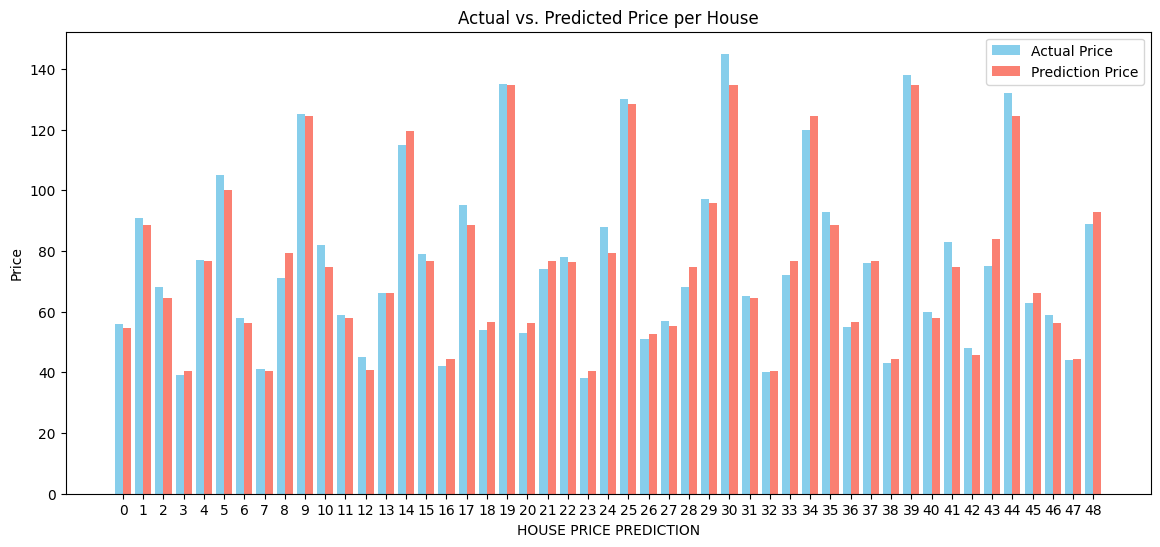

In [32]:
plt.figure(figsize=(14, 6))
plt.bar(inputs.index, inputs['Price'], color='skyblue', width=0.4, label='Actual Price')
plt.bar(inputs.index + 0.4, inputs['Predicted_Price'], color='salmon', width=0.4, label='Prediction Price')
plt.title("Actual vs. Predicted Price per House")
plt.xlabel("HOUSE PRICE PREDICTION")
plt.ylabel("Price")
plt.xticks(inputs.index + 0.2, inputs.index)
plt.legend()
plt.show()